**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: José Eduardo De Moraes López
*   MATRÍCULA: A01634782
*   NOMBRE: Jorge Andrés Moya Pacheco
*   MATRÍCULA: A00813287
*   NOMBRE: Julio Miguel Díaz de León García
*   MATRÍCULA: A01796215
*   NOMBRE: Julio de Jesús Alvarez Martínez
*   MATRÍCULA: A01374016


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import os
#DIR = "/content/drive/MyDrive/Equipo43DS"
#os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer, MinMaxScaler,OneHotEncoder
import category_encoders as ce

In [ ]:
pd.set_option('display.max_columns', 170)

In [ ]:
!pip install category_encoders

In [ ]:
#import tensorflow as tf
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
cars_df = pd.read_csv('C:/Users/julio/Downloads/vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.


In [ ]:
columns_to_drop = ['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long']
cars_df.drop(columns=columns_to_drop, inplace=True)

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [ ]:
num_observations = cars_df.shape[0]  # Cantidad de observaciones o registros
num_columns = cars_df.shape[1]       # Número de columnas después del borrado

# Mostrar las cantidades
print(f"Cantidad de observaciones: {num_observations}")
print(f"Número de columnas después de borrar: {num_columns}")

cars_df.info()

Cantidad de observaciones: 426880
Número de columnas después de borrar: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  county        0 n

## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://www.quora.com/How-much-missing-data-is-too-much-1

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [ ]:
missing_percentages = cars_df.isnull().mean() * 100

# Mostrar los porcentajes
print("Porcentaje de valores faltantes por columna:")
print(missing_percentages)

Porcentaje de valores faltantes por columna:
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
county          100.000000
state             0.000000
dtype: float64


In [ ]:
missing_percentages = cars_df.isnull().mean() * 100

threshold = 0.70 * cars_df.shape[0]  # Umbral del 30% de valores faltantes
cars_df.dropna(thresh=threshold, axis=1, inplace=True)

# Contar cuántas columnas se eliminaron
print(f"Columnas eliminadas: {missing_percentages[missing_percentages >= 30].index.tolist()}")

Columnas eliminadas: ['condition', 'cylinders', 'drive', 'size', 'paint_color', 'county']


Se eliminaron 6 columnas

Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [ ]:
columns_to_clean = missing_percentages[missing_percentages < 5].index
initial_rows = cars_df.shape[0]
cars_df.dropna(subset=columns_to_clean, inplace=True)

# Calcular el porcentaje de registros eliminados
rows_dropped = initial_rows - cars_df.shape[0]
percentage_rows_dropped = (rows_dropped / initial_rows) * 100

print(f"Porcentaje de registros eliminados: {percentage_rows_dropped:.2f}%")

Porcentaje de registros eliminados: 8.73%


In [ ]:
num_records_end=len( cars_df) #registros tras la limpieza (se usará más adelante)

2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [ ]:
cars_df.isna().mean() * 100

region           0.000000
region_url       0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
fuel             0.000000
odometer         0.000000
title_status     0.000000
transmission     0.000000
type            21.208201
state            0.000000
dtype: float64

Solo tenemos valores NaN en `type` que no es una variable numérica, por lo que se hará imputación con la moda en esa variable

In [ ]:
for column in cars_df.columns:
    if cars_df[column].isnull().sum() > 0:
        if cars_df[column].dtype in ['float64', 'int64']: #Si es num mediana
            median_value = cars_df[column].median()
            cars_df[column] = cars_df[column].fillna(median_value)
        else:
            mode_value = cars_df[column].mode()[0]
            cars_df[column] = cars_df[column].fillna(mode_value) #Si es cat moda

In [ ]:
cars_df.info()
cars_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389604 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        389604 non-null  object 
 1   region_url    389604 non-null  object 
 2   price         389604 non-null  int64  
 3   year          389604 non-null  float64
 4   manufacturer  389604 non-null  object 
 5   model         389604 non-null  object 
 6   fuel          389604 non-null  object 
 7   odometer      389604 non-null  float64
 8   title_status  389604 non-null  object 
 9   transmission  389604 non-null  object 
 10  type          389604 non-null  object 
 11  state         389604 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 38.6+ MB


,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
27,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al
28,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al
29,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al
30,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al
31,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al


In [ ]:
cars_df['type'].value_counts()

sedan          163604
SUV             71578
pickup          40934
truck           32035
other           19442
coupe           17109
hatchback       14998
wagon           10095
van              7518
convertible      6884
mini-van         4553
offroad           549
bus               305
Name: type, dtype: int64

## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

In [ ]:
cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,389604.0,63955.275919,1.144865e+07,0.0,5995.0,13995.0,26590.0,3.736929e+09
year,389604.0,2011.605338,8.639863e+00,1900.0,2009.0,2014.0,2017.0,2.022000e+03
odometer,389604.0,96352.396487,1.914181e+05,0.0,38093.0,85753.0,133315.0,1.000000e+07


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'odometer'}>, <AxesSubplot:>]],
      dtype=object)

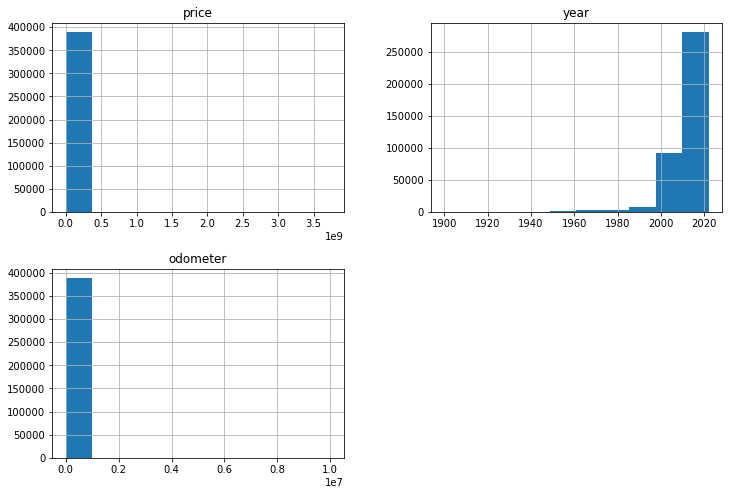

In [ ]:
cars_df[['price', 'year', 'odometer']].hist(figsize=(12, 8))

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

<AxesSubplot:>

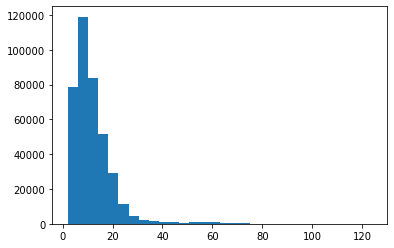

In [ ]:
current_year = 2024
cars_df['age'] = current_year - cars_df['year']

# Eliminar la columna year
cars_df.drop(columns='year', inplace=True)

# Generar el histograma de la nueva variable age
cars_df['age'].hist(figsize=(6, 4), bins=30, grid=False)

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

* Boxplot price

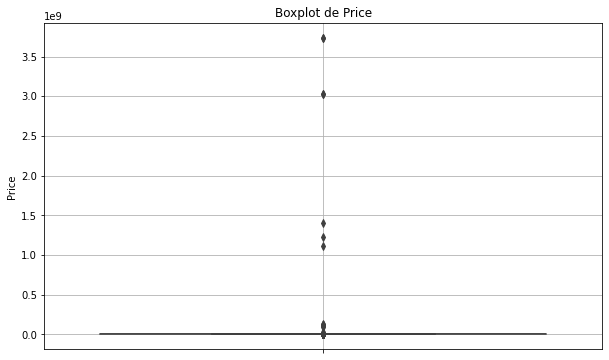

In [ ]:
# Crear el boxplot de la columna "price"
plt.figure(figsize=(10, 6))
sns.boxplot(data=cars_df, y='price')

# Personalizar el gráfico
plt.title('Boxplot de Price')
plt.ylabel('Price')
plt.grid(True)
plt.show()

* Boxplot age

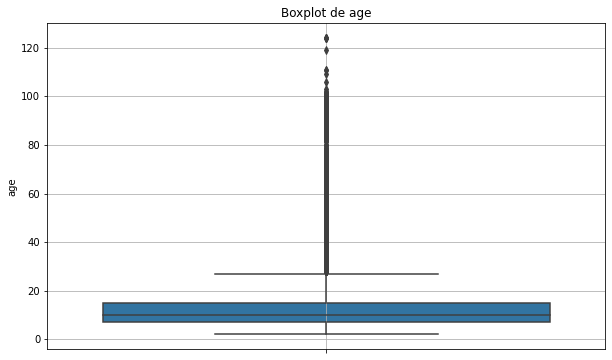

In [ ]:
# Crear el boxplot de la columna "age"
plt.figure(figsize=(10, 6))
sns.boxplot(data=cars_df, y='age')

# Personalizar el gráfico
plt.title('Boxplot de age')
plt.ylabel('age')
plt.grid(True)
plt.show()

* Boxplot odometer

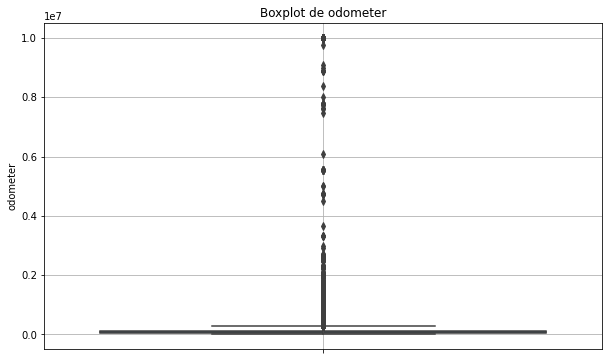

In [ ]:
# Crear el boxplot de la columna "odometer"
plt.figure(figsize=(10, 6))
sns.boxplot(data=cars_df, y='odometer')

# Personalizar el gráfico
plt.title('Boxplot de odometer')
plt.ylabel('odometer')
plt.grid(True)
plt.show()

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se han eliminado en total hasta ahora?

Hay dos enfoques posibles para resolver esta pregunta:
1. Ir variable a variable: Calculando el porcentaje de valores atipicos y eliminandolos del dataframe para una variable antes de pasar a la siguiente
2. Todas a la vez: Calcular primero los porcentajes de valores atípicos de todas las variables y después eliminarlos del dataframe

1. Ir variable a variable

El resultado con este enfoque dependera del orden de aplicación en las variables, aqui haremos 2 ejercicios con las variables en orden distinto para ilustrarlo

In [ ]:
num_records=num_observations

In [ ]:
num_records_end

389604

In [ ]:
# Calcula el IQR y los outliers y después los elimina del dataframe
def calculate_iqr_outliers(df, column, num_records_end, num_records):
    percentile_25 = df[column].quantile(0.25)
    percentile_75 = df[column].quantile(0.75)
    iqr = percentile_75 - percentile_25
    upper_limit = percentile_75 + 1.5 * iqr
    lower_limit = percentile_25 - 1.5 * iqr

    IQR_outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    outliers_count = len(IQR_outliers)
    df=df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

    print(f"El porcentaje de outliers (vs dataframe tras limpieza en ejercicios previos) en {column} es: {(outliers_count/num_records_end)*100:.3f}%")
    print(f"El porcentaje de outliers (vs inicial) en {column} es: {(outliers_count/num_records)*100:.3f}%")

    return df

* Aplicamos en el orden: price, age y odometer

In [ ]:
cars_df_copy=cars_df

In [ ]:
# Aplicación de la función para cada variable
cars_df_copy=calculate_iqr_outliers(cars_df_copy, 'price', num_records_end, num_records)
cars_df_copy=calculate_iqr_outliers(cars_df_copy, 'age', num_records_end, num_records)
cars_df_copy=calculate_iqr_outliers(cars_df_copy, 'odometer', num_records_end, num_records)



f"Porcentaje total de eliminados de los registros iniciales {(1-cars_df_copy.shape[0]/num_records)*100:.3f} %"

El porcentaje de outliers (vs dataframe tras limpieza en ejercicios previos) en price es: 1.708%
El porcentaje de outliers (vs inicial) en price es: 1.559%
El porcentaje de outliers (vs dataframe tras limpieza en ejercicios previos) en age es: 3.016%
El porcentaje de outliers (vs inicial) en age es: 2.753%
El porcentaje de outliers (vs dataframe tras limpieza en ejercicios previos) en odometer es: 0.709%
El porcentaje de outliers (vs inicial) en odometer es: 0.647%


'Porcentaje total de eliminados de los registros iniciales 13.692 %'

In [ ]:
cars_df_copy_test=cars_df_copy

* Aplicamos en el orden: price, odometer y age

In [ ]:
cars_df_copy=cars_df

In [ ]:
# Aplicación de la función para cada variable
cars_df_copy=calculate_iqr_outliers(cars_df_copy, 'price', num_records_end, num_records)
cars_df_copy=calculate_iqr_outliers(cars_df_copy, 'odometer', num_records_end, num_records)
cars_df_copy=calculate_iqr_outliers(cars_df_copy, 'age', num_records_end, num_records)


f"Porcentaje total de eliminados de los registros iniciales {(1-cars_df_copy.shape[0]/num_records)*100:.3f} %"


El porcentaje de outliers (vs dataframe tras limpieza en ejercicios previos) en price es: 1.708%
El porcentaje de outliers (vs inicial) en price es: 1.559%
El porcentaje de outliers (vs dataframe tras limpieza en ejercicios previos) en odometer es: 0.817%
El porcentaje de outliers (vs inicial) en odometer es: 0.746%
El porcentaje de outliers (vs dataframe tras limpieza en ejercicios previos) en age es: 3.443%
El porcentaje de outliers (vs inicial) en age es: 3.143%


'Porcentaje total de eliminados de los registros iniciales 14.180 %'

2. Todas a la vez

Primero calculamos los outliers para las 3 variables para después eliminarlos en el dataframe cars_df

In [ ]:
cars_df_copy=cars_df

* Outliers Price

In [ ]:
percentile_25 = cars_df['price'].quantile(0.25)
percentile_75 = cars_df['price'].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit_price = percentile_75 + 1.5 * iqr
lower_limit_price = percentile_25 - 1.5 * iqr
IQR_outliers_price= cars_df[(cars_df['price'] < lower_limit_price) | (cars_df['price'] > upper_limit_price)]
outliers_price=len(IQR_outliers_price)

print(f"El porcentaje de outliers (vs dataframe tras limipieza ejercicios previos) en price es:{(outliers_price/num_records_end)*100:.3f}%")
print(f"El porcentaje de outliers (vs inicial) en price es:{(outliers_price/num_records)*100:.3f}%")

El porcentaje de outliers (vs dataframe tras limipieza ejercicios previos) en price es:1.708%
El porcentaje de outliers (vs inicial) en price es:1.559%


* Outliers age

In [ ]:
percentile_25 = cars_df['age'].quantile(0.25)
percentile_75 = cars_df['age'].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit_age = percentile_75 + 1.5 * iqr
lower_limit_age = percentile_25 - 1.5 * iqr
IQR_outliers_age= cars_df[(cars_df['age'] < lower_limit_age) | (cars_df['age'] > upper_limit_age)]
outliers_age=len(IQR_outliers_age)

print(f"El porcentaje de outliers (vs dataframe tras limipieza ejercicios previos) en age es: {(outliers_age/num_records_end)*100:.3f}%)")
print(f"El porcentaje de outliers (vs inicial) en age es: {(outliers_age/num_records)*100:.3f}%")

El porcentaje de outliers (vs dataframe tras limipieza ejercicios previos) en age es: 3.647%)
El porcentaje de outliers (vs inicial) en age es: 3.329%


* Outliers odometer

In [ ]:
percentile_25 = cars_df['odometer'].quantile(0.25)
percentile_75 = cars_df['odometer'].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit_odometer = percentile_75 + 1.5 * iqr
lower_limit_odometer = percentile_25 - 1.5 * iqr
IQR_outliers_odometer= cars_df[(cars_df['odometer'] < lower_limit_odometer) | (cars_df['odometer'] > upper_limit_odometer)]
outliers_odometer=len(IQR_outliers_odometer)

print(f"El porcentaje de outliers (vs dataframe tras limipieza ejercicios previos) en odometer es:{(outliers_odometer/num_records_end)*100:.3f}%)")
print(f"El porcentaje de outliers (vs inicial) en odometer es:{(outliers_odometer/num_records)*100:.3f}%")

El porcentaje de outliers (vs dataframe tras limipieza ejercicios previos) en odometer es:0.828%)
El porcentaje de outliers (vs inicial) en odometer es:0.756%


In [ ]:
#Eliminamos outliers price
cars_df=cars_df[(cars_df['price'] >= lower_limit_price) & (cars_df['price'] <= upper_limit_price)]
#Eliminamos outliers age
cars_df=cars_df[(cars_df['age'] >= lower_limit_age) & (cars_df['age'] <= upper_limit_age)]
#Eliminamos outliers odometer
cars_df=cars_df[(cars_df['odometer'] >= lower_limit_odometer) & (cars_df['odometer'] <= upper_limit_odometer)]

In [ ]:
num_records_2nd_clean=len(cars_df) #Registros tras quitar outliers

In [ ]:
num_records_2nd_clean

366328

In [ ]:
num_records

426880

In [ ]:
print(f"Porcentaje total de eliminados de los registros iniciales: {(1-(num_records_2nd_clean/num_records))*100:.3f}%")

Porcentaje total de eliminados de los registros iniciales: 14.185%


Sin importar cual de los enfoques descritos en este inciso se tome, resultará válido y solo cuestión de interpretación, nosotros nos quedaremos con los valores descritos en el primero que abordamos y será lo que consideremos en el dataframe `cars_df` para los siguientes ejercicios

In [ ]:
cars_df=cars_df_copy_test

4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'odometer'}>, <AxesSubplot:>]],
      dtype=object)

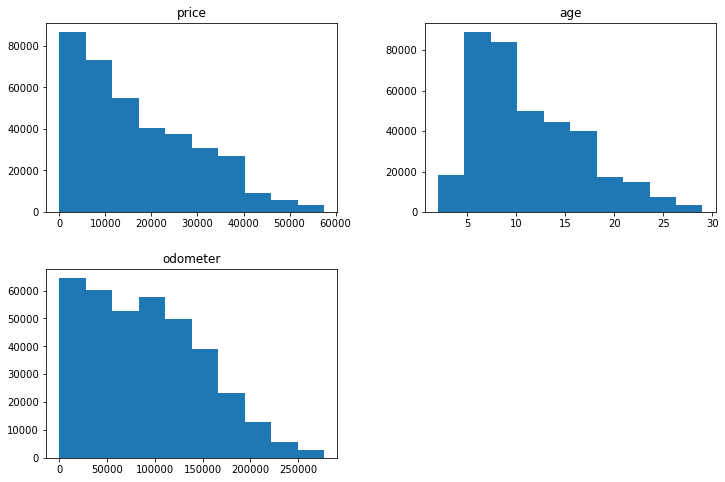

In [ ]:
cars_df[['price', 'age', 'odometer']].hist(figsize=(12, 8), bins=10, grid=False)

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


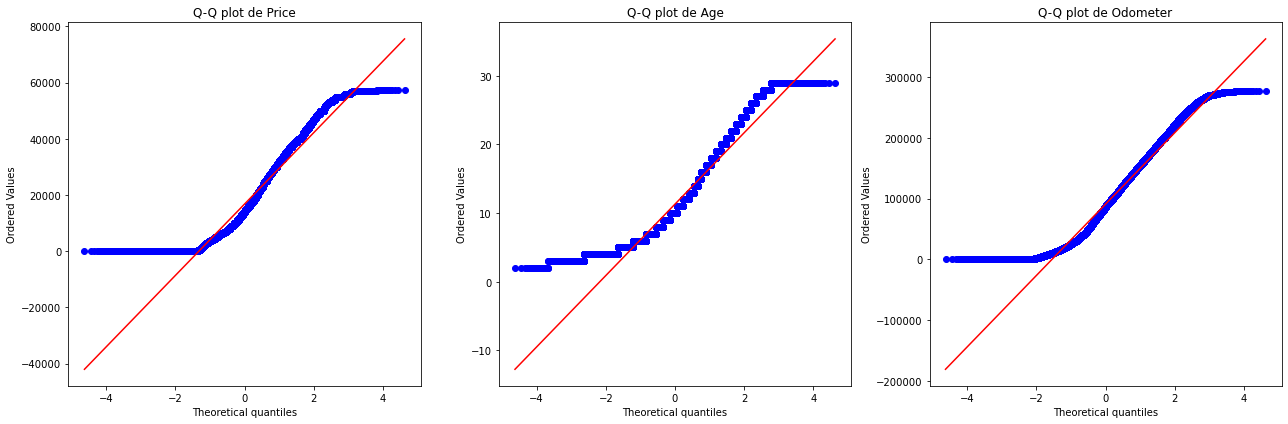

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Q-Q plot de 'price'
stats.probplot(cars_df['price'], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q plot de Price')

# Q-Q plot de 'age'
stats.probplot(cars_df['age'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q plot de Age')

# Q-Q plot de 'odometer'
stats.probplot(cars_df['odometer'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q plot de Odometer')

plt.tight_layout()
plt.show()

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

Recuerda que en `PowerTransformer()` el parámetro `standardize` por defecto es `True`. Con esto, después de hacer la transformación, el resultado se escala con *Z-score*, haciendo que la media sea 0 y la desviación estándar 1. Como en el ejercicio 6 ocuparás Min-Max para escalar, haz `standardize=False` para omitir el escalamiento en esta fase.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Coloca el resultado en un dataframe denominado `transf_df` que contenga sólo las variables transformadas.

In [ ]:
from sklearn.preprocessing import PowerTransformer
yeo_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
variables_a_transformar = ['price', 'age', 'odometer']

# Transformar las variables seleccionadas
transf_df = pd.DataFrame(yeo_transformer.fit_transform(cars_df[variables_a_transformar]), columns=variables_a_transformar)

5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

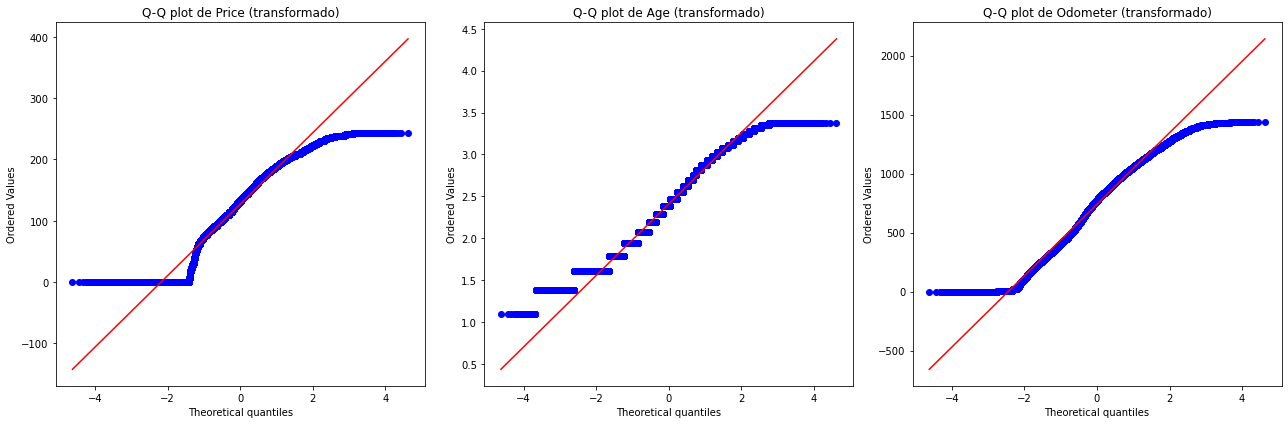

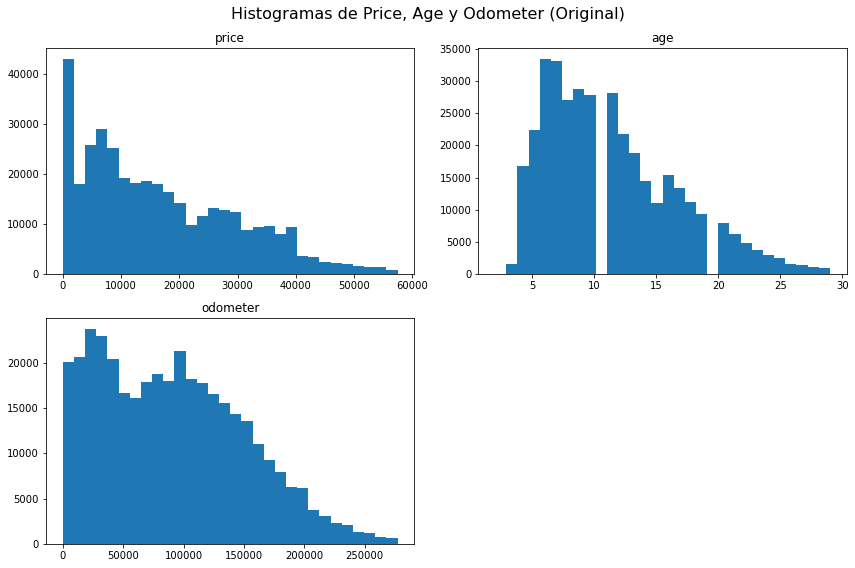

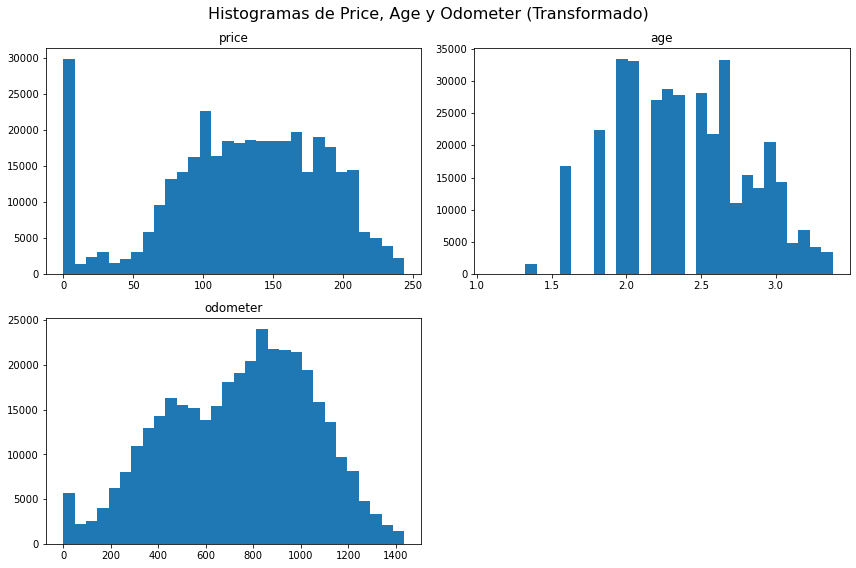

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Q-Q plot de 'price' transformado
stats.probplot(transf_df['price'], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q plot de Price (transformado)')

# Q-Q plot de 'age' transformado
stats.probplot(transf_df['age'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q plot de Age (transformado)')

# Q-Q plot de 'odometer' transformado
stats.probplot(transf_df['odometer'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q plot de Odometer (transformado)')

plt.tight_layout()
plt.show()

# Histogramas
# Histograma de las variables originales
cars_df[['price', 'age', 'odometer']].hist(figsize=(12, 8), bins=30, grid=False)
plt.suptitle('Histogramas de Price, Age y Odometer (Original)', fontsize=16)
plt.tight_layout()
plt.show()

# Histograma de las variables transformadas
transf_df[['price', 'age', 'odometer']].hist(figsize=(12, 8), bins=30, grid=False)
plt.suptitle('Histogramas de Price, Age y Odometer (Transformado)', fontsize=16)
plt.tight_layout()
plt.show()

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Coloca el resultado en un dataframe denominado `minmax_df`.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
minmax_df = pd.DataFrame(scaler.fit_transform(transf_df), columns=transf_df.columns)
print("Rango de las variables después del escalamiento Min-Max:")
print(minmax_df.describe())

Rango de las variables después del escalamiento Min-Max:
               price            age       odometer
count  368433.000000  368433.000000  368433.000000
mean        0.522044       0.573900       0.516409
std         0.244451       0.188187       0.212465
min         0.000000       0.000000       0.000000
25%         0.377517       0.426949       0.353861
50%         0.545020       0.565257       0.540242
75%         0.711531       0.727794       0.677899
max         1.000000       1.000000       1.000000


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

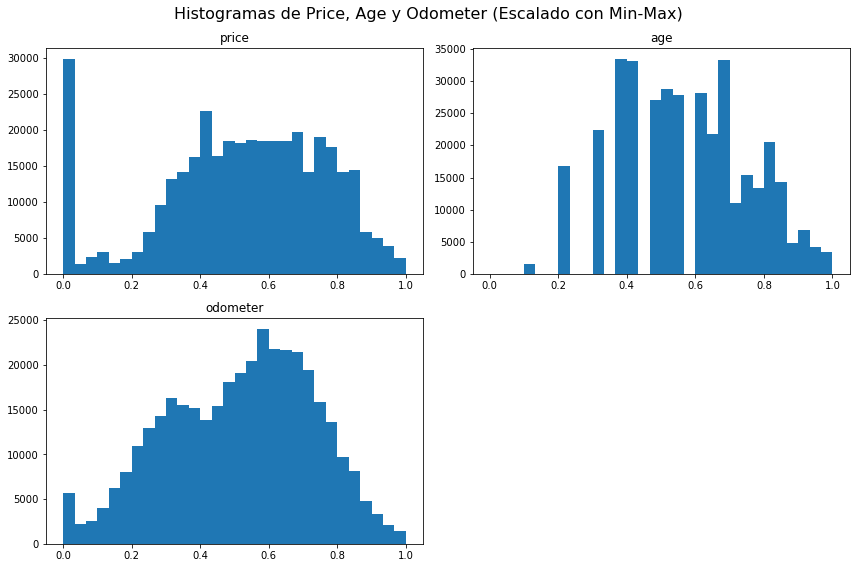

In [ ]:
minmax_df[['price', 'age', 'odometer']].hist(figsize=(12, 8), bins=30, grid=False)
plt.suptitle('Histogramas de Price, Age y Odometer (Escalado con Min-Max)', fontsize=16)
plt.tight_layout()
plt.show()

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [ ]:
cars_df.describe(include='object')

,region,region_url,manufacturer,model,fuel,title_status,transmission,type,state
count,368433,368433,368433,368433,368433,368433,368433,368433,368433
unique,404,413,40,19314,5,6,3,13,51
top,columbus,https://grandrapids.craigslist.org,ford,f-150,gas,clean,automatic,sedan,ca
freq,3201,2745,62162,7477,313944,356757,293338,155206,42333


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

In [ ]:
highly_cardinal_variables = []
few_cardinal_variables = []
# Separar las variables en función de su cardinalidad
for col in cars_df.select_dtypes(include='object'):
    unique_values = cars_df[col].nunique()  # Número de valores únicos
    if unique_values >= 100:
        highly_cardinal_variables.append(col)
    else:
        few_cardinal_variables.append(col)
print(highly_cardinal_variables)
print(few_cardinal_variables)

['region', 'region_url', 'model']
['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

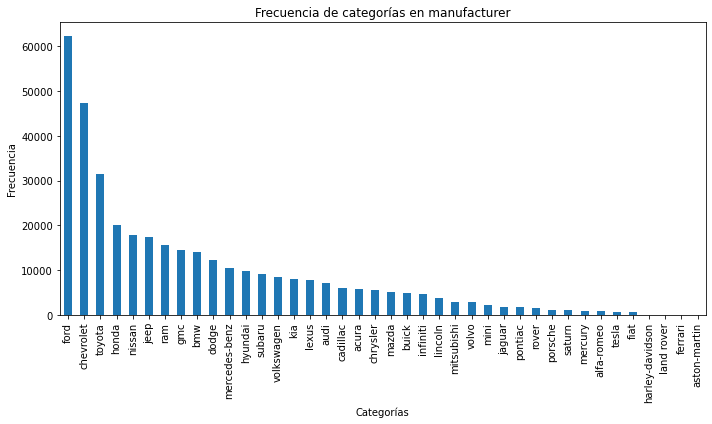

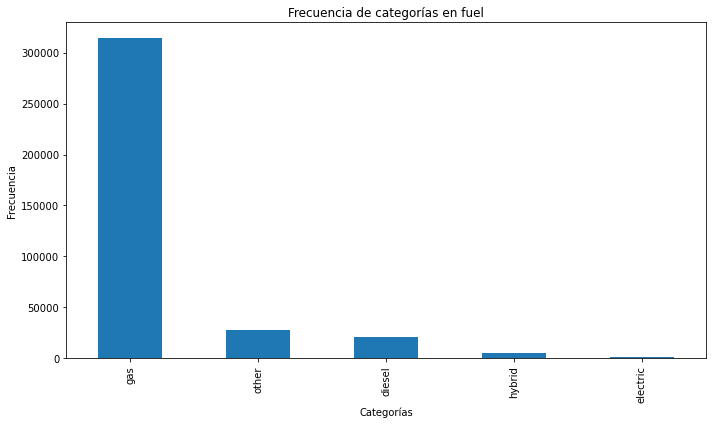

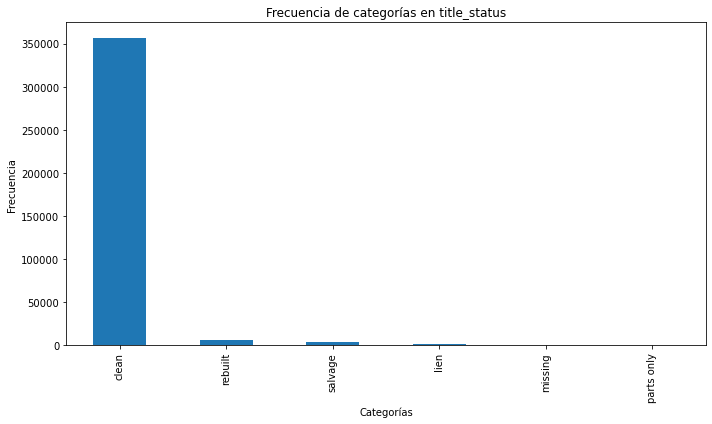

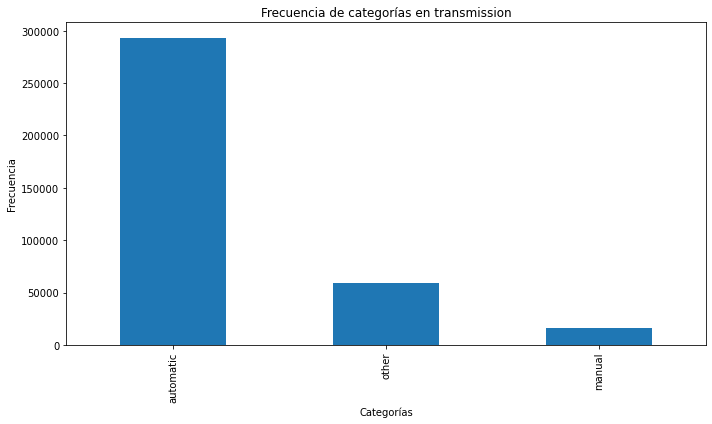

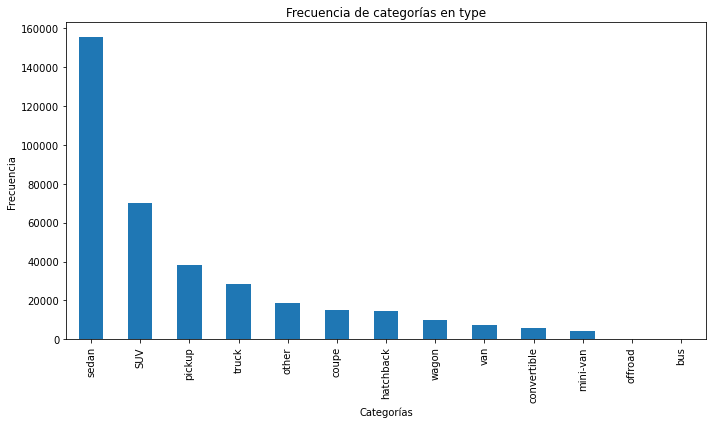

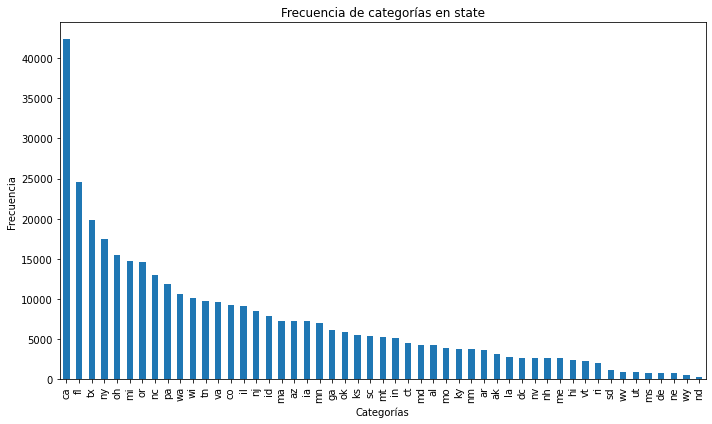

In [ ]:
for col in few_cardinal_variables:
    plt.figure(figsize=(10, 6))
    cars_df[col].value_counts().plot(kind='bar')
    plt.title(f'Frecuencia de categorías en {col}')
    plt.xlabel('Categorías')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [ ]:
onehot_df = pd.get_dummies(cars_df[few_cardinal_variables], drop_first=True)

# Verificar el resultado de la codificación one-hot
print("DataFrame con codificación one-hot (few_cardinal_variables):")


DataFrame con codificación one-hot (few_cardinal_variables):


In [ ]:
onehot_df.head()

,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
27,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
onehot_df.shape

(368433, 112)

9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

In [ ]:
!pip install category_encoders
import category_encoders as ce

# Aplicar codificación binaria a las variables de alta cardinalidad
binary_encoder = ce.BinaryEncoder(cols=highly_cardinal_variables, drop_invariant=True)
binary_df = binary_encoder.fit_transform(cars_df[highly_cardinal_variables])

# Verificar el resultado de la codificación binaria
print("DataFrame con codificación binaria (highly_cardinal_variables):")
binary_df.head()

DataFrame con codificación binaria (highly_cardinal_variables):


,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,region_url_1,region_url_2,region_url_3,region_url_4,region_url_5,region_url_6,region_url_7,region_url_8,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
27,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
31,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
binary_df.shape

(368433, 33)

10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [ ]:
minmax_df.reset_index(drop=True, inplace=True)
onehot_df.reset_index(drop=True, inplace=True)
binary_df.reset_index(drop=True, inplace=True)

final_df = pd.concat([minmax_df, onehot_df, binary_df], axis=1)

# Verificar el DataFrame final
print("DataFrame final después de la concatenación:")
final_df.head()

DataFrame final después de la concatenación:


,price,age,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,region_url_1,region_url_2,region_url_3,region_url_4,region_url_5,region_url_6,region_url_7,region_url_8,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0.794413,0.565257,0.435888,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.669900,0.699813,0.486465,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.852455,0.222541,0.242097,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0.767405,0.426949,0.363384,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.561575,0.603020,0.663928,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
final_df.shape

(368433, 148)